## Author: Chia-Yun (Sandy) Chiang



# 1. Introduction
According to [CDC](https://www.cdc.gov/workplacehealthpromotion/tools-resources/workplace-health/mental-health/index.html), mental health is a big issue in the workplace. It not only hurts human body but also causes some problems in the workplace. CDC suggests that employers could promote awareness of mental health issues, leading to a healthier work environment. 

However, from the employee side, there might have some factors which influence the willingness to discuss mental health issues with their employer. As a result, this project aimed to learn more about mental health issues through employee survey data. 

# 2. Dataset Description
In this project, I used the dataset from Kaggle (source: https://www.kaggle.com/osmi/mental-health-in-tech-survey). This dataset is 2014 mental health survey in the workplace, which includes 27 columns and 1259 records. Most of the columns represent one survey question and record the answer from respondents.

The description of each column as below (below description are all from Kaggle):   

- **Timestamp**
- **Age**
- **Gender**
- **Country**
- **state**: If you live in the United States, which state or territory do you live in?
- **self_employed**: Are you self-employed?
- **family_history**: Do you have a family history of mental illness?
- **treatment**: Have you sought treatment for a mental health condition?
- **work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?
- **no_employees**: How many employees does your company or organization have?
- **remote_work**: Do you work remotely (outside of an office) at least 50% of the time?
- **tech_company**: Is your employer primarily a tech company/organization?
- **benefits**: Does your employer provide mental health benefits?
- **care_options**: Do you know the options for mental health care your employer provides?
- **wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?
- **seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?
- **anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- **leave**: How easy is it for you to take medical leave for a mental health condition?
- **mentalhealthconsequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?
- **physhealthconsequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?
- **coworkers**: Would you be willing to discuss a mental health issue with your coworkers?
- **supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- **mentalhealthinterview**: Would you bring up a mental health issue with a potential employer in an interview?
- **physhealthinterview**: Would you bring up a physical health issue with a potential employer in an interview?
- **mentalvsphysical**: Do you feel that your employer takes mental health as seriously as physical health?
- **obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- **comments**: Any additional notes or comments

# 3. Purpose of this project

I divided this project into two parts.

In part I, I did exploratory data analysis and tried to answer some questions regarding this survey using inferential statistics.     
In part II, I built a prediction model which trying to predict whether respondents have sought for mental health treatment before.


# Part I: Exploratory Data Analysis & Inferential Statistic

# Import libraries

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
%matplotlib inline
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
plt.style.use('seaborn-white')
plt.style.use('seaborn-pastel')
plt.rcParams["figure.figsize"] = (24,8)

# Import data

In [348]:
# https://docs.google.com/spreadsheets/d/e/2PACX-1vSCYywqmeyUTz0q_I4ODgHl3Umo7ke3pxL1v5Jh_7_8iA-UrIxfgeIpA60xsUYxi5sDOv2hnOvSc_4T/pub?gid=1038743524&single=true&output=csv
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSCYywqmeyUTz0q_I4ODgHl3Umo7ke3pxL1v5Jh_7_8iA-UrIxfgeIpA60xsUYxi5sDOv2hnOvSc_4T/pub?gid=1038743524&single=true&output=csv"
df = pd.read_csv(path)

# Overview of dataset

In [349]:
df.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [350]:
df.tail(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,No,No,Yes,Yes,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [351]:
df.shape

(1259, 27)

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [353]:
# Check null value in each column
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [354]:
df.describe(include="all")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:43:28,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Summary & Next steps**
- Check Gender column (it has 49 unique value)
- Check Country column
- Visualize Age column
- Consider to drop Timestamp and comments column
- Deal with columns which includes null value (state, self_employed, and work_interfere)

## Check Gender Column

In [355]:
df["Gender"].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Cis Male                                            2
Female (trans)                                      2
Female                                              2
Man                                                 2
A little about you                                  1
All                                                 1
woman                                               1
Enby                        

In [356]:
df["Gender"] = [x.lower().strip() for x in df["Gender"]]
df["Gender"].value_counts()

male                                              824
female                                            185
m                                                 150
f                                                  53
make                                                4
woman                                               4
cis male                                            3
man                                                 2
female (trans)                                      2
femail                                              1
nah                                                 1
trans-female                                        1
something kinda male?                               1
msle                                                1
cis man                                             1
male leaning androgynous                            1
ostensibly male, unsure what that really means      1
neuter                                              1
enby                        

In [357]:
# others includes transgender, genderfluid, gender-neutral, and all the other gender categories. 
# Reference to the method to clean data from: https://www.kaggle.com/aishu200023/mental-health-survey-analysis

male = ["male", "m", "make", "cis male", "man", "malr", "male-ish", "maile",
        "mal", "male (cis)", "mail", "msle", "cis man"]
female = ["others", "female", "f", "woman", "femail", "femake", "cis-female/femme",
          "cis female", "female (cis)"]
others = ["female (trans)", "something kinda male?", "queer/she/they", 
          "guy (-ish) ^_^", "neuter", "enby",
          "ostensibly male, unsure what that really means","genderqueer",
          "queer", "agender", "fluid", "non-binary", "trans woman","all",
          "trans-female", "androgyne", "male leaning androgynous", "nah"]
drop = ["p", "a little about you"]

df["Gender"] = df["Gender"].apply(lambda x:"male" if x in male else x)
df["Gender"] = df["Gender"].apply(lambda x:"female" if x in female else x)
df["Gender"] = df["Gender"].apply(lambda x:"others" if x in others else x)
df["Gender"] = df["Gender"].apply(lambda x:"drop" if x in drop else x)

In [358]:
df["Gender"].value_counts()

male      991
female    247
others     19
drop        2
Name: Gender, dtype: int64

In [359]:
# Drop unknown gedner records
to_drop = ["drop"]
df = df[~df["Gender"].isin(to_drop)]
df["Gender"].value_counts()

male      991
female    247
others     19
Name: Gender, dtype: int64

## Check Country column

In [360]:
# Percentage of each country
round(df["Country"].value_counts()/df["Country"].value_counts().sum(),3)

United States             0.597
United Kingdom            0.147
Canada                    0.057
Germany                   0.036
Netherlands               0.021
Ireland                   0.021
Australia                 0.017
France                    0.010
India                     0.008
New Zealand               0.006
Switzerland               0.006
Sweden                    0.006
Poland                    0.006
Italy                     0.006
Brazil                    0.005
South Africa              0.005
Belgium                   0.005
Israel                    0.004
Singapore                 0.003
Bulgaria                  0.003
Mexico                    0.002
Finland                   0.002
Russia                    0.002
Austria                   0.002
Croatia                   0.002
Greece                    0.002
Denmark                   0.002
Colombia                  0.002
Portugal                  0.002
Hungary                   0.001
Spain                     0.001
Philippi

**Notes**
- USA is the majority in this dataset (consider as our target objective for further EDA)

## Visualize Age column

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


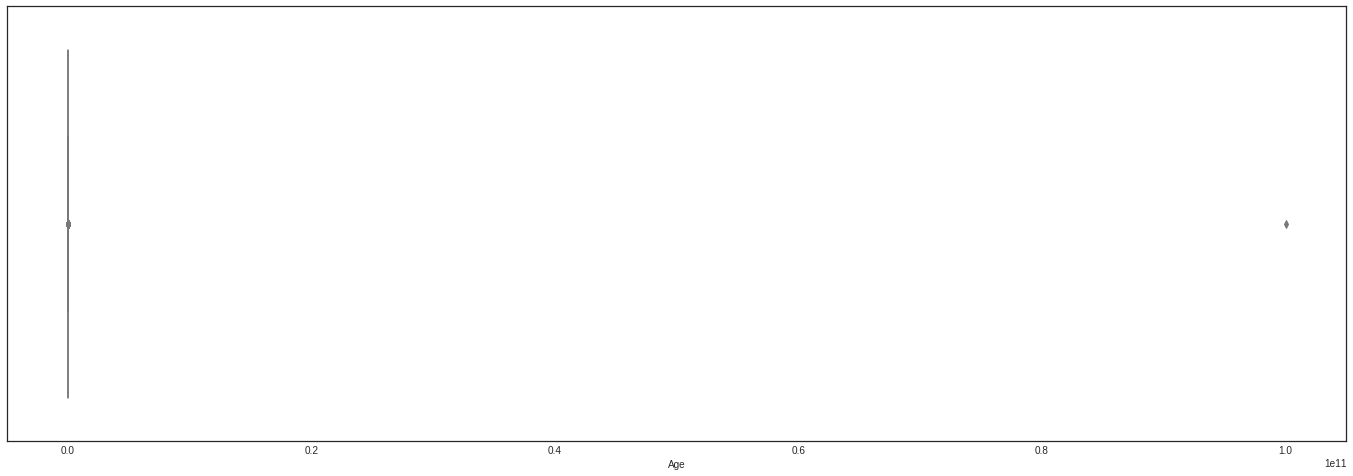

In [361]:
sns.boxplot(df['Age'])

In [362]:
df["Age"].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 46             12
 45             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 56              4
 49              4
 57              3
 55              3
 54              3
 60              2
 47              2
 11              1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
 5               1
Name: Age, dtype: int64

**Notes**
- Need to remove outlier 

In [363]:
# Remove outlier
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
df = df[(df.Age > lower_bound) & (df.Age < upper_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


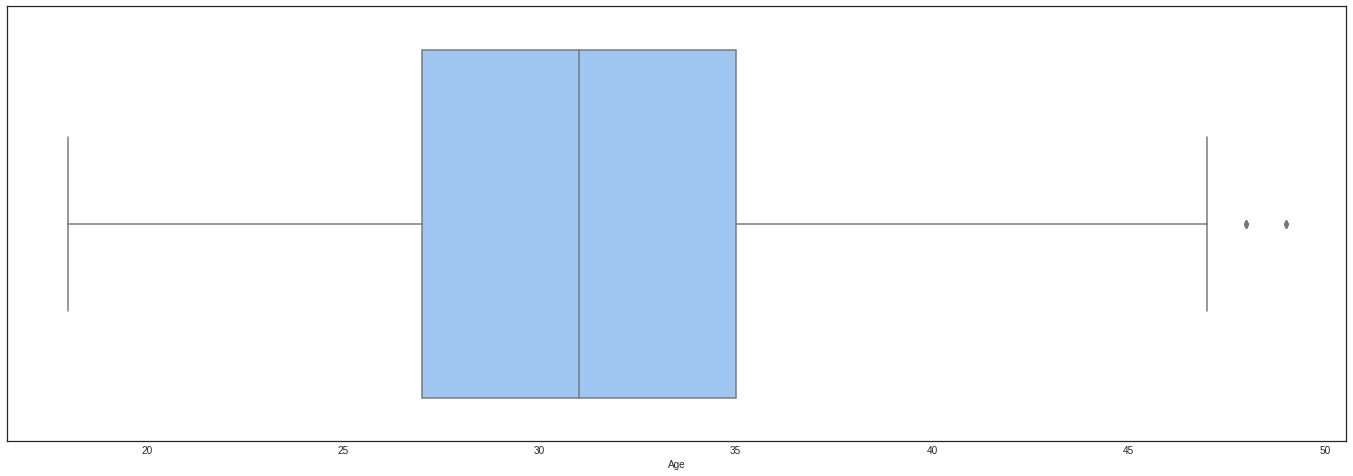

In [364]:
sns.boxplot(df['Age'])

## Drop Timestamp and comments column

In [365]:
df.drop(columns =["Timestamp", "comments"], inplace = True)

In [366]:
df.head(3)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No


## Deal with columns which includes null value (state, self_employed, and work_interfere)

In [367]:
df["state"].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'MS', 'RI', 'WY', 'LA',
       'ME'], dtype=object)

In [368]:
df[df.Country == "United States"].state.isnull().sum()

9

In [369]:
df["state"] = df["state"].fillna("Unknown")

**Notes**
- Other countries do not have state (reasonable)

In [370]:
df["self_employed"].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [371]:
df["self_employed"] = df["self_employed"].fillna("Unknown")

In [372]:
df["self_employed"].unique()

array(['Unknown', 'Yes', 'No'], dtype=object)

In [373]:
df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [374]:
df["work_interfere"] = df["work_interfere"].fillna("No_answer")

In [375]:
df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', 'No_answer'], dtype=object)

In [376]:
# Check all the null value have been cleaned
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

# Exploratory Data Analysis

### Defined Scope: Focus on United States sub-dataset

In [377]:
df_USA = df[df["Country"] == "United States"]

In [378]:
df_USA.shape

(721, 25)

- Total 721 records

### State column

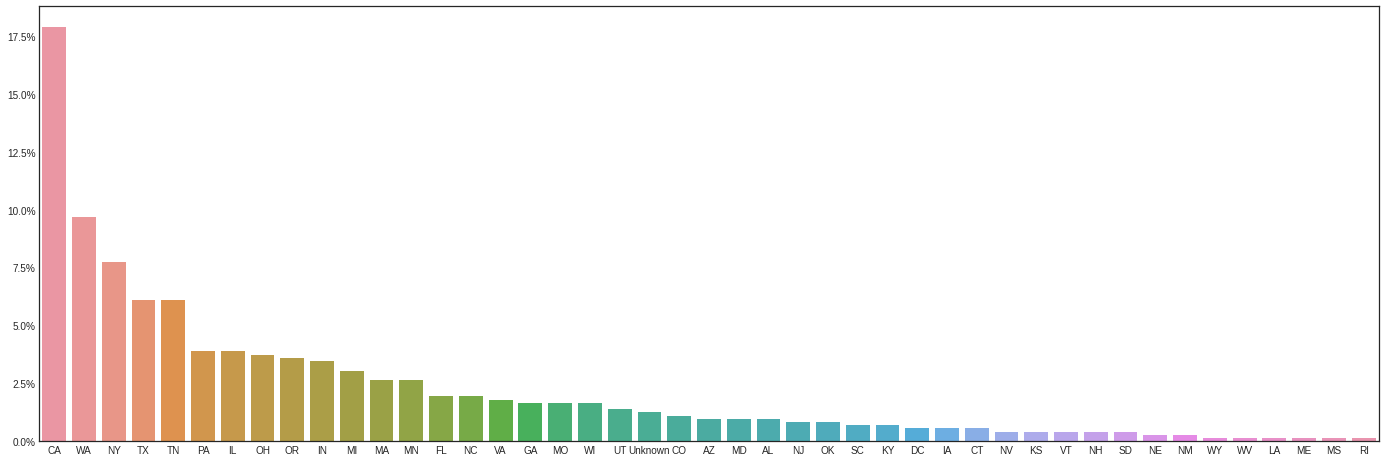

In [379]:
# Visualize states percentage
state_data = df_USA["state"].value_counts() / df_USA["state"].value_counts().sum()
ax = sns.barplot(x = state_data.index, y = state_data.values)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1, symbol = "%"))

- In this survey, CA has the major records (>17.5%), followed by WA(\~10%), NY(\~7.5%), TN(\~6%), TX(\~6%)...

### Age column

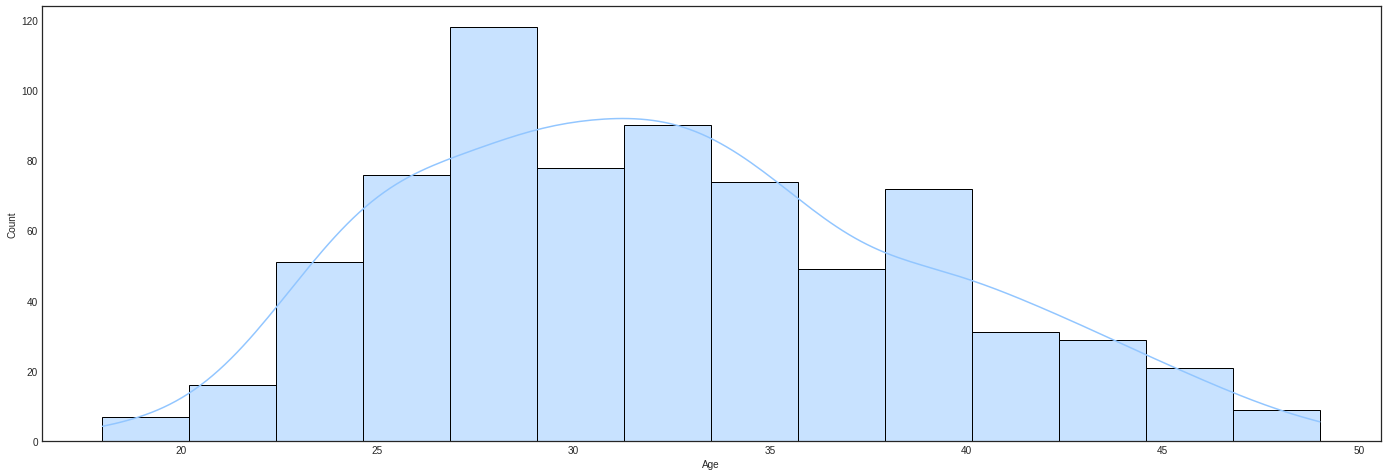

In [380]:
sns.histplot(data = df_USA, x="Age", kde = True)

In [381]:
df_USA["Age"].describe()

count    721.000000
mean      32.348128
std        6.427115
min       18.000000
25%       27.000000
50%       32.000000
75%       37.000000
max       49.000000
Name: Age, dtype: float64

- In this survey, if we remove the outlier, we have age range from 18 to 49 with mean age 32.

### Gender column

In [382]:
round(df_USA["Gender"].value_counts()/df_USA["Gender"].value_counts().sum(),3)

male      0.742
female    0.247
others    0.011
Name: Gender, dtype: float64

- Gender is inbalance in this survey
- Male 74.2% ; Female 24.7% ; Other_Gender 1.1%

### Gender & Age column

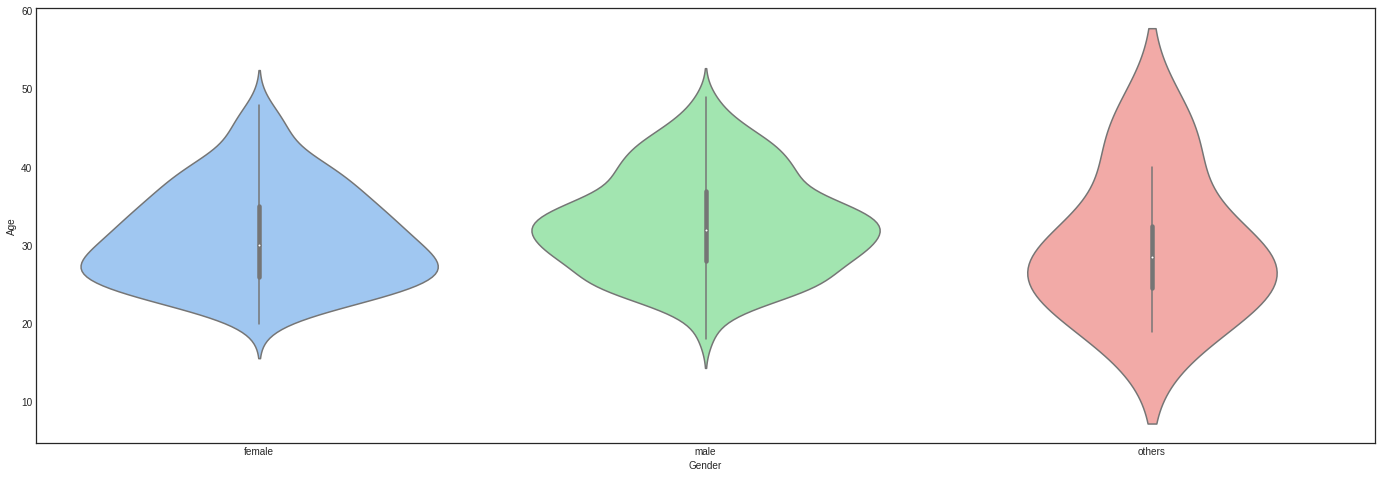

In [383]:
ax = sns.violinplot(x="Gender", y = "Age", data = df_USA)

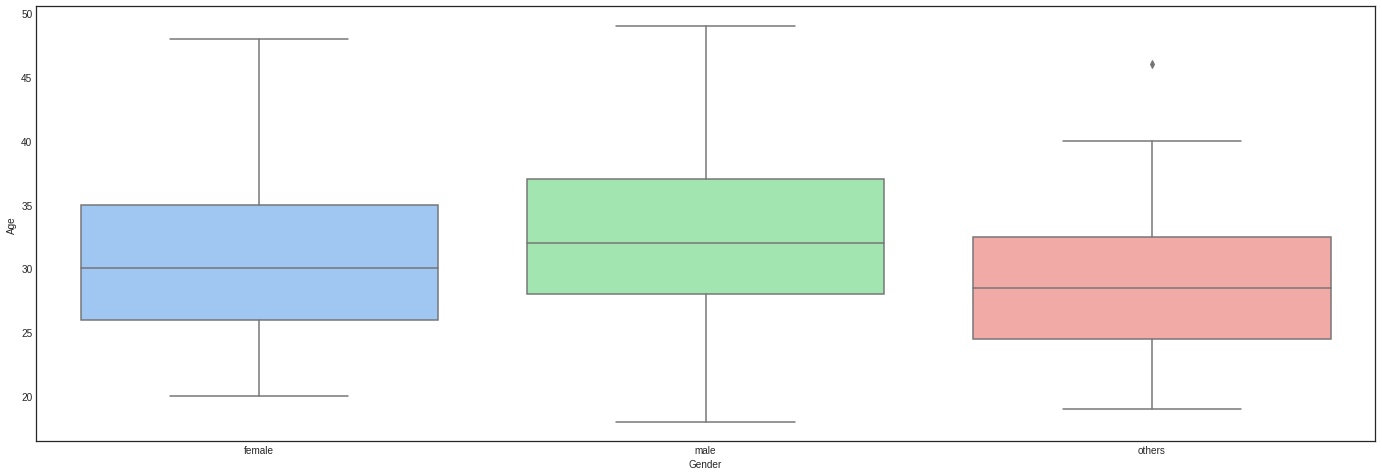

In [384]:
sns.boxplot(x="Gender", y = "Age", data=df_USA)

- In this survey, other gender has high dispersion of age than female and male. Also the median age of other gender is lower than the other two.


In [385]:
# Define function which generate the percentage of counts of one column
def column_perc(column):
    print(round(df_USA[column].value_counts()/df_USA[column].value_counts().sum(),3)*100)

# Define function which generate percentage table 
def generate_perc_table(group1, group2):
    count = df_USA.groupby([group1, group2]).agg({group2:"count"})
    perc = count.groupby(level=0).apply(lambda x:round(100*x/x.sum(),2))
    print(perc)

In [386]:
# Knowing the percentage for each column
for i in df_USA.columns:
    column_perc(i)

29    6.9
33    6.4
32    6.1
35    5.7
31    5.7
25    5.4
26    5.1
30    5.1
27    4.7
28    4.7
34    4.6
36    3.9
40    3.9
23    3.7
38    3.5
24    3.3
37    2.9
43    2.8
39    2.6
41    2.2
42    2.1
46    1.7
22    1.2
44    1.2
45    1.2
21    1.0
48    0.6
49    0.4
18    0.4
47    0.3
20    0.3
19    0.3
Name: Age, dtype: float64
male      74.2
female    24.7
others     1.1
Name: Gender, dtype: float64
United States    100.0
Name: Country, dtype: float64
CA         17.9
WA          9.7
NY          7.8
TX          6.1
TN          6.1
PA          3.9
IL          3.9
OH          3.7
OR          3.6
IN          3.5
MI          3.1
MA          2.6
MN          2.6
FL          1.9
NC          1.9
VA          1.8
GA          1.7
MO          1.7
WI          1.7
UT          1.4
Unknown     1.2
CO          1.1
AZ          1.0
MD          1.0
AL          1.0
NJ          0.8
OK          0.8
SC          0.7
KY          0.7
DC          0.6
IA          0.6
CT          0.6
NV          0.4

- Based on above percentage data, we could know the percentage of responds with respect to each survey question. 
- For example, in "family_histroy" column (which indicates the survey question: Do you have a family history of mental illness?), there are 44.7% respondents said Yes; and 55.3% respondents said No.

### Treatment related inference
- treatment YES: People have been sought for mental treatment before.
- treatment NO: People have never sought for mental treatment before.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

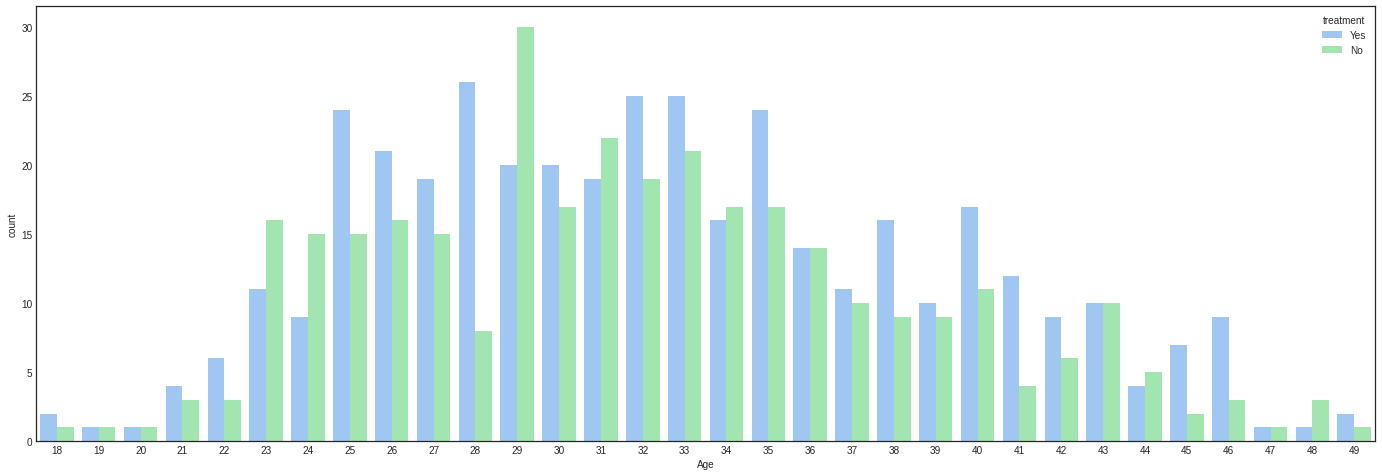

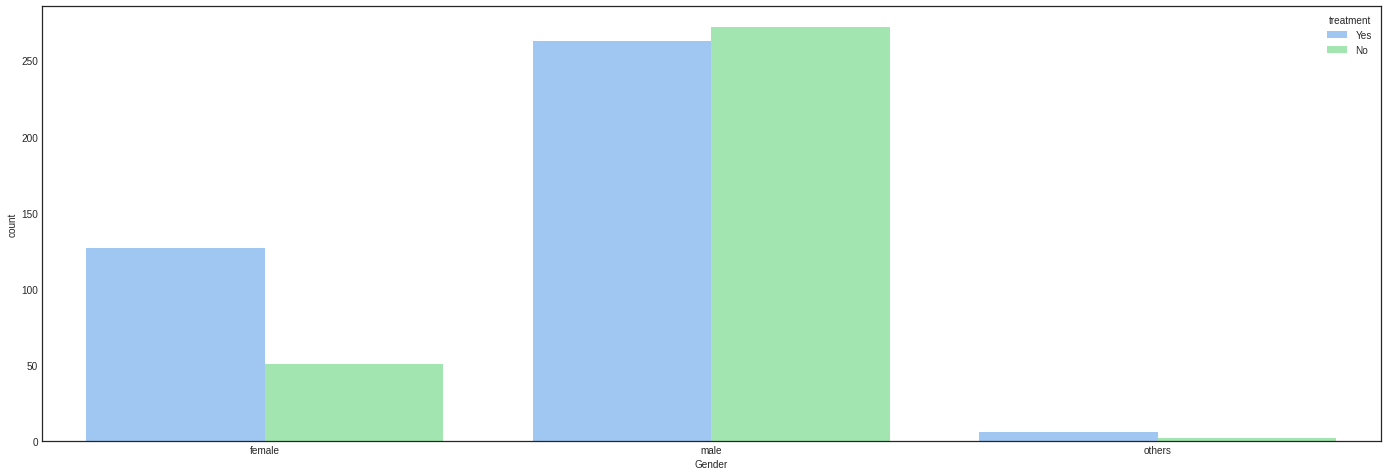

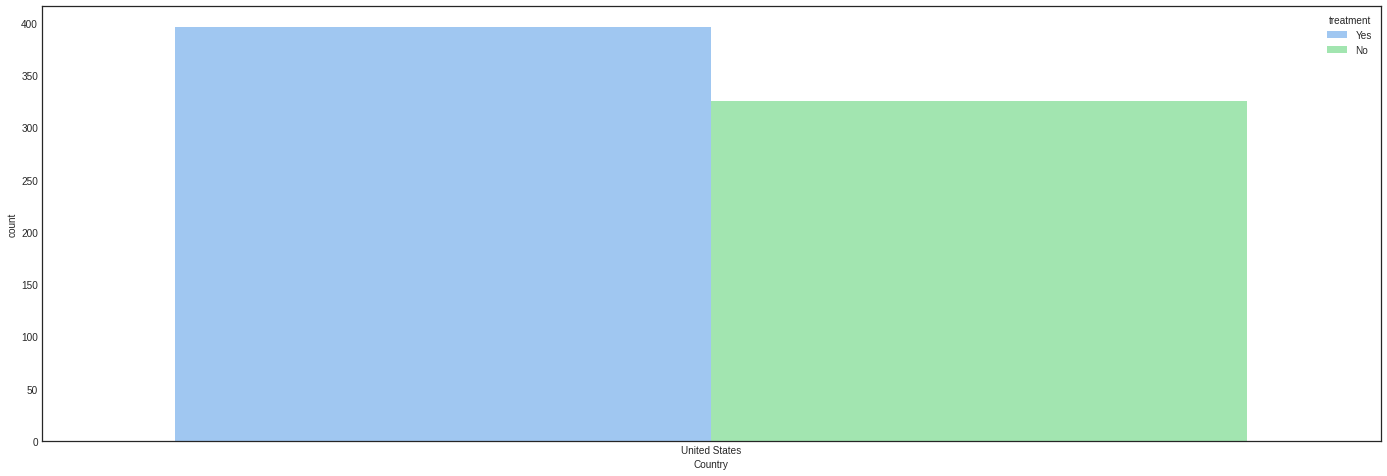

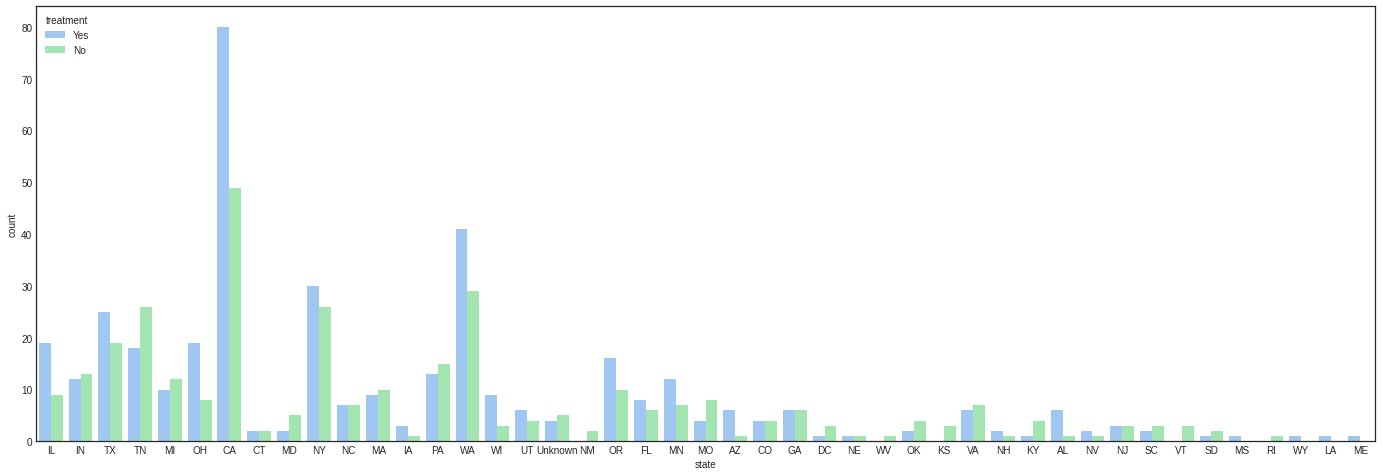

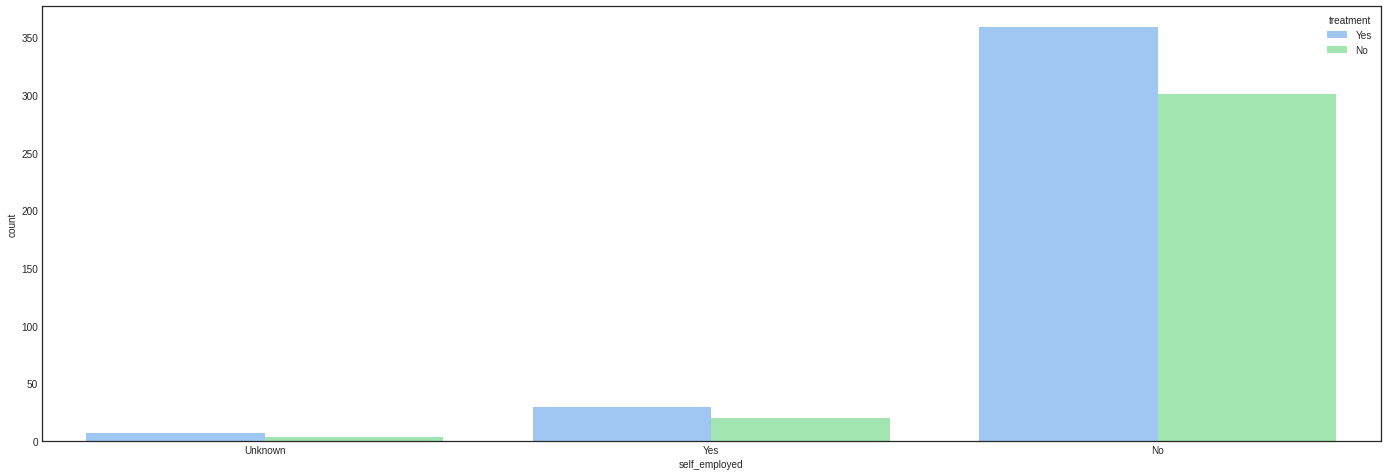

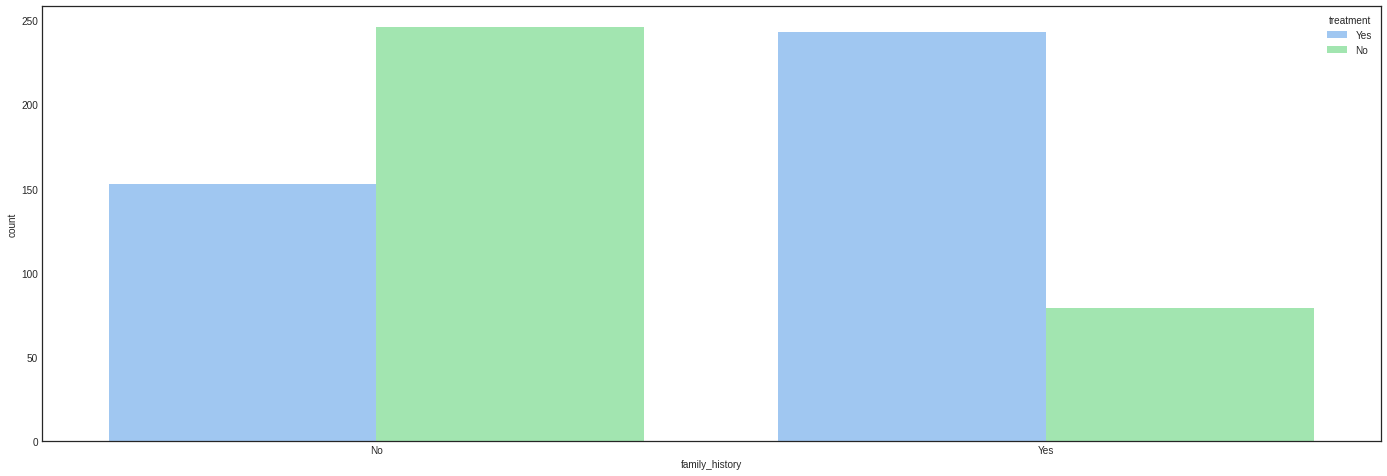

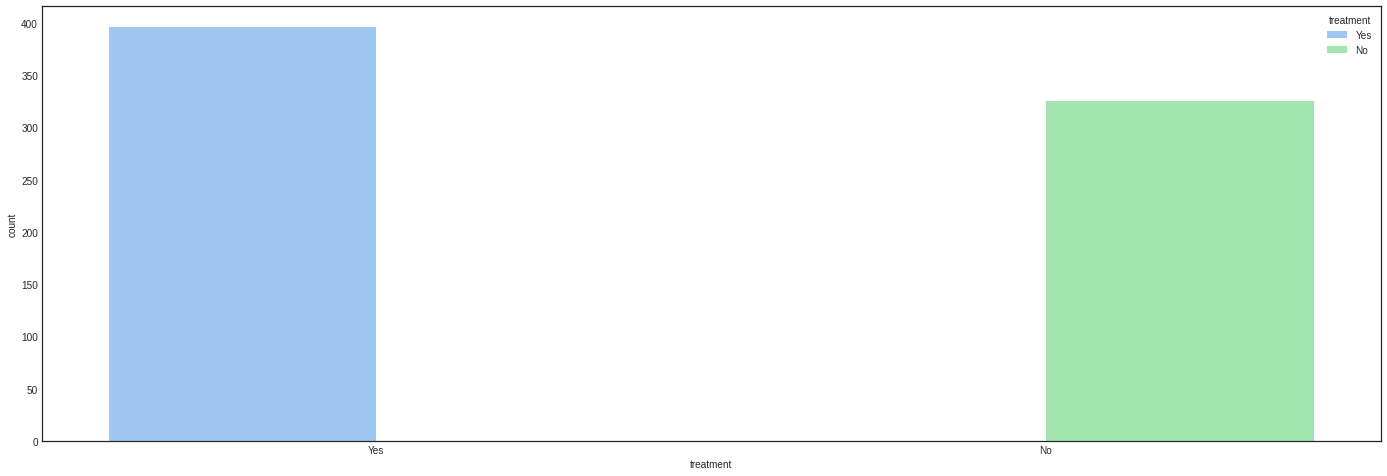

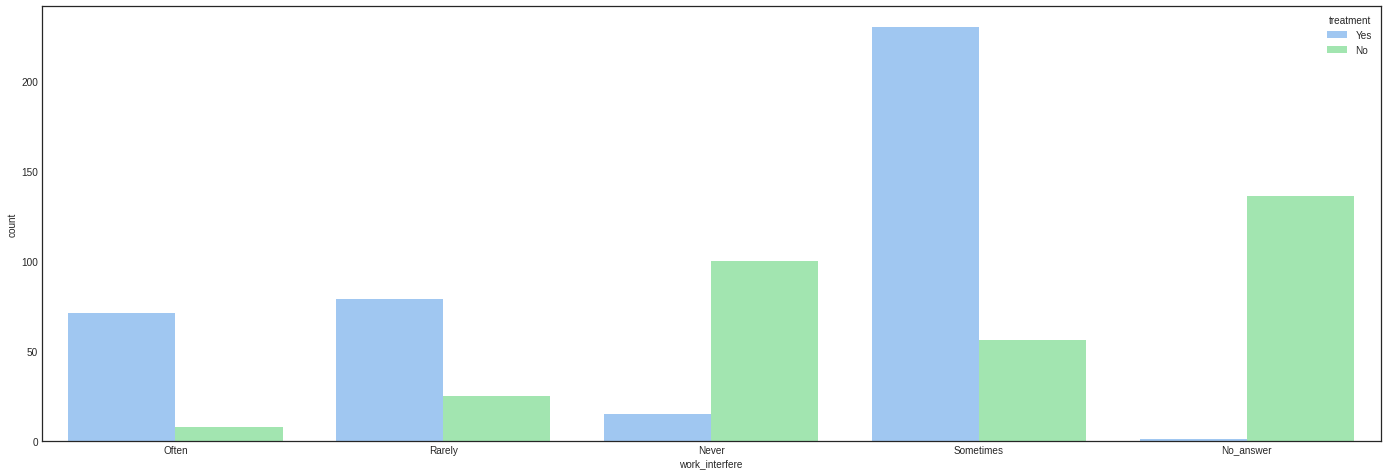

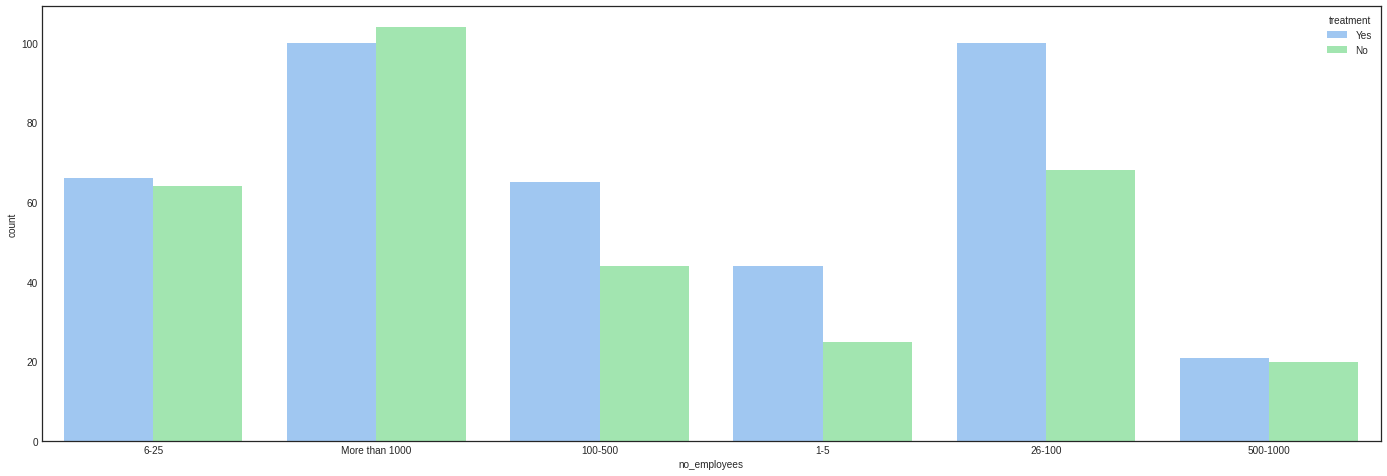

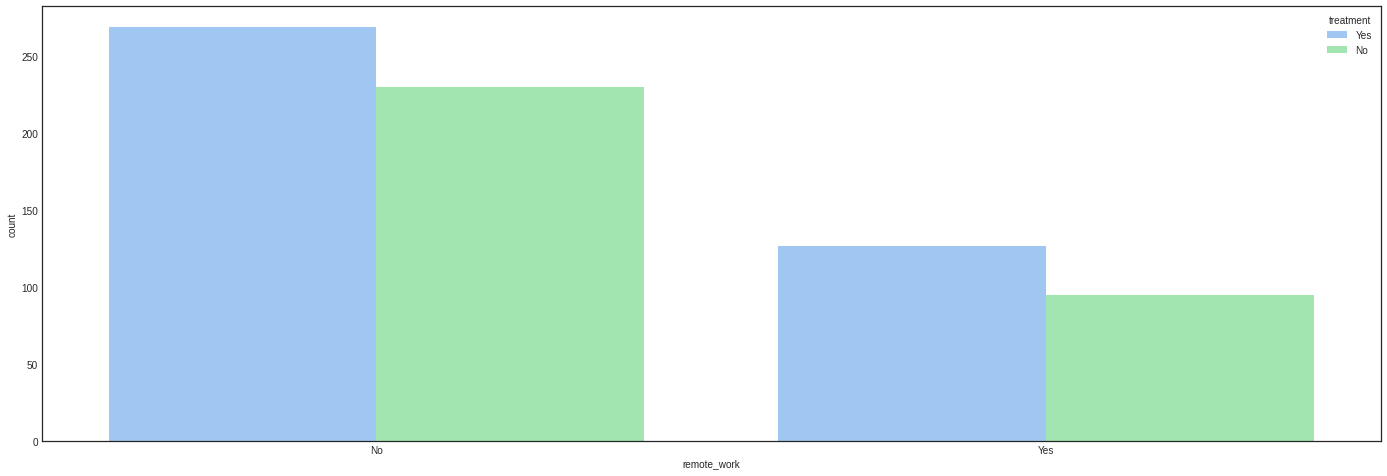

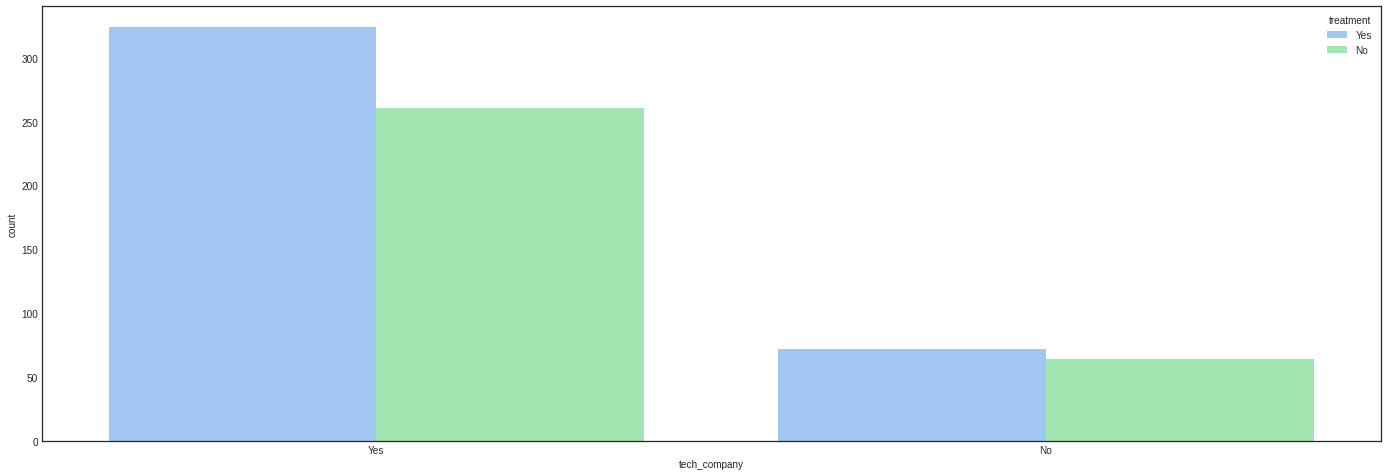

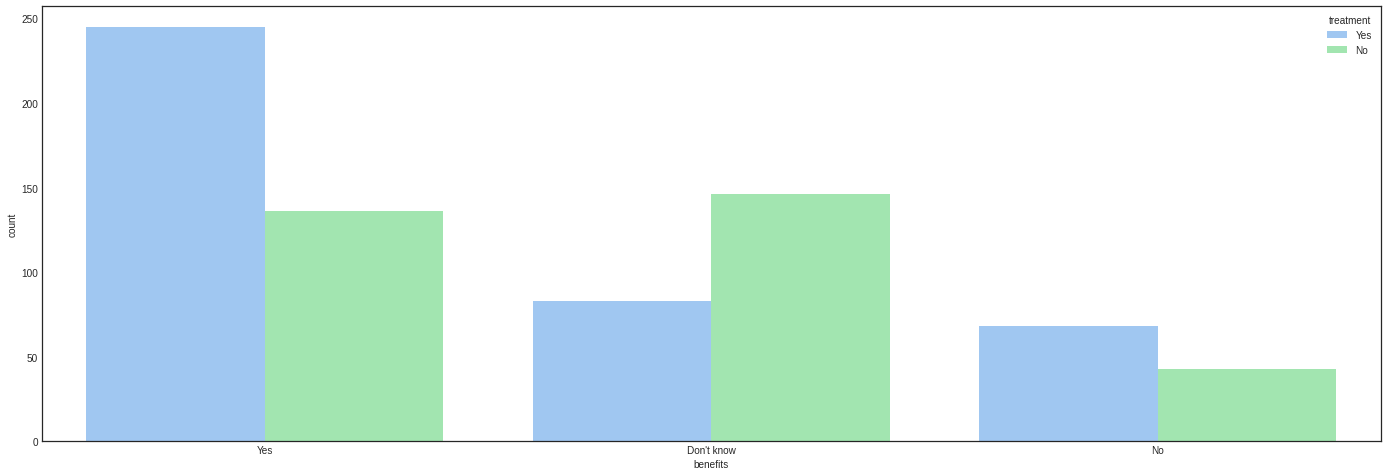

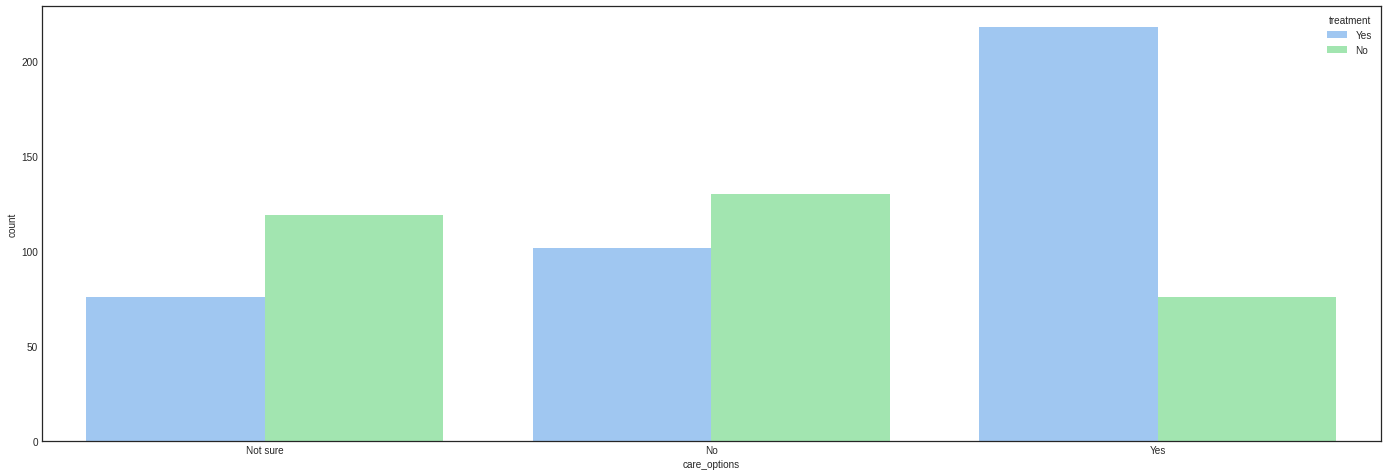

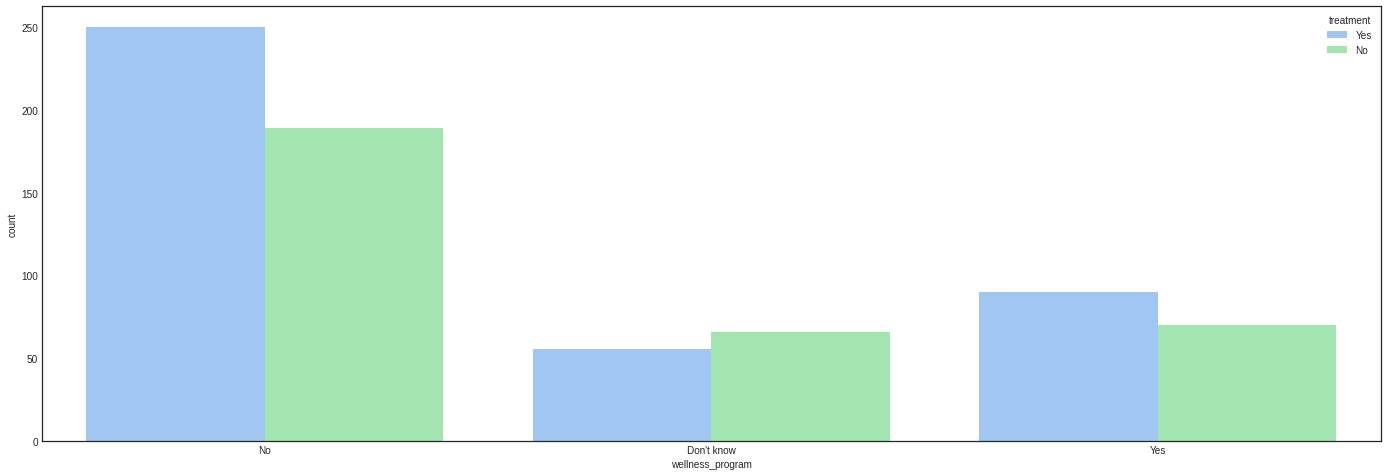

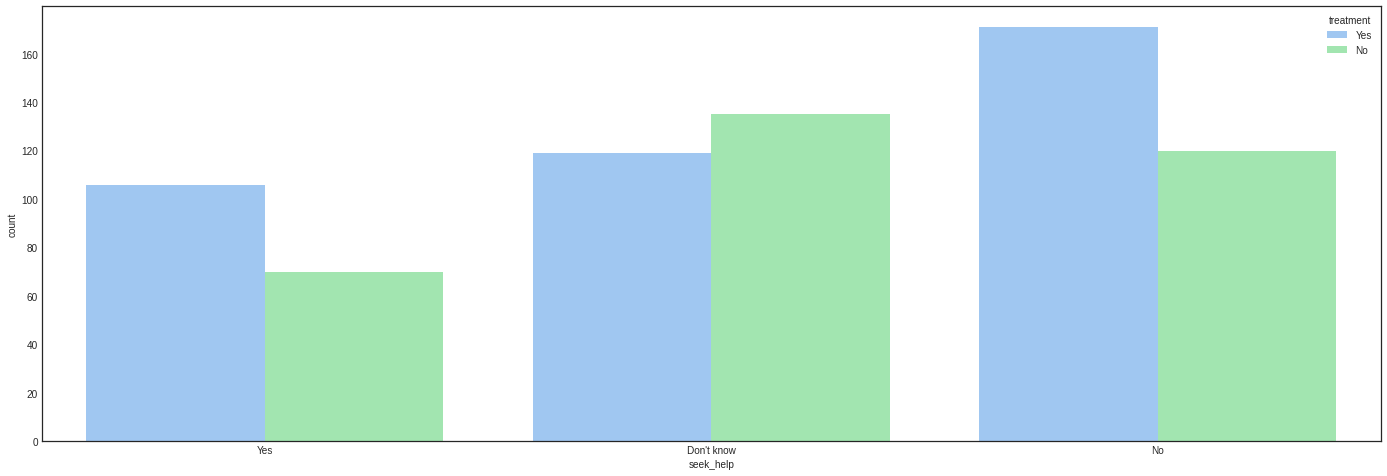

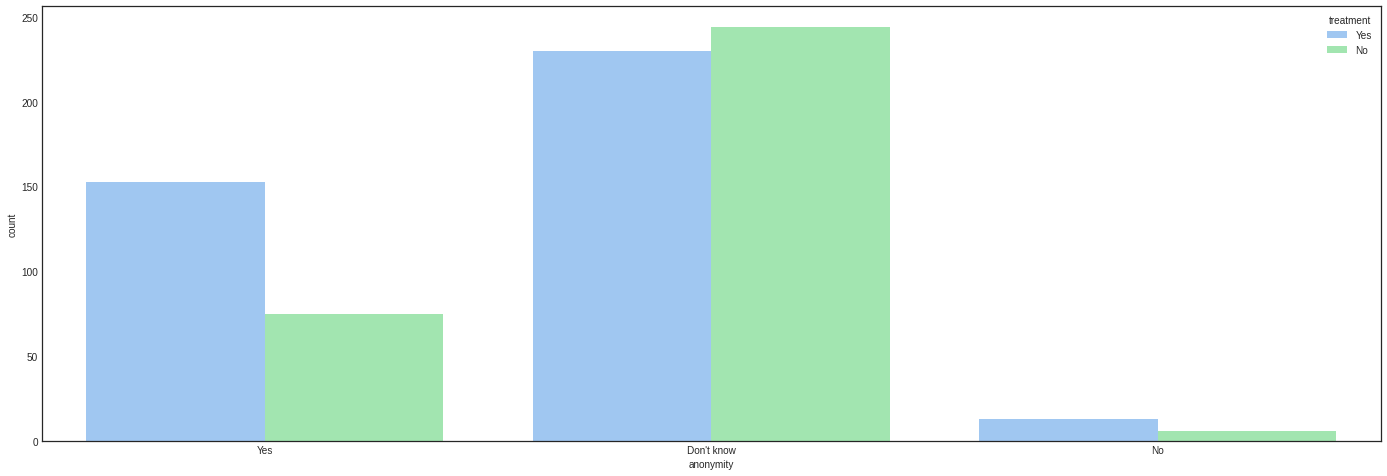

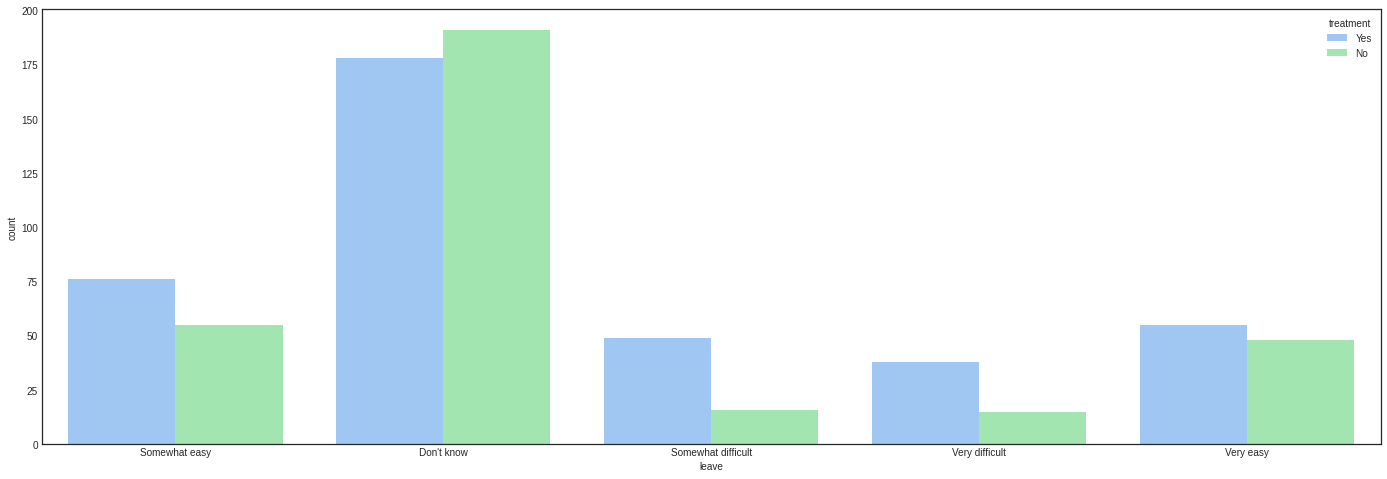

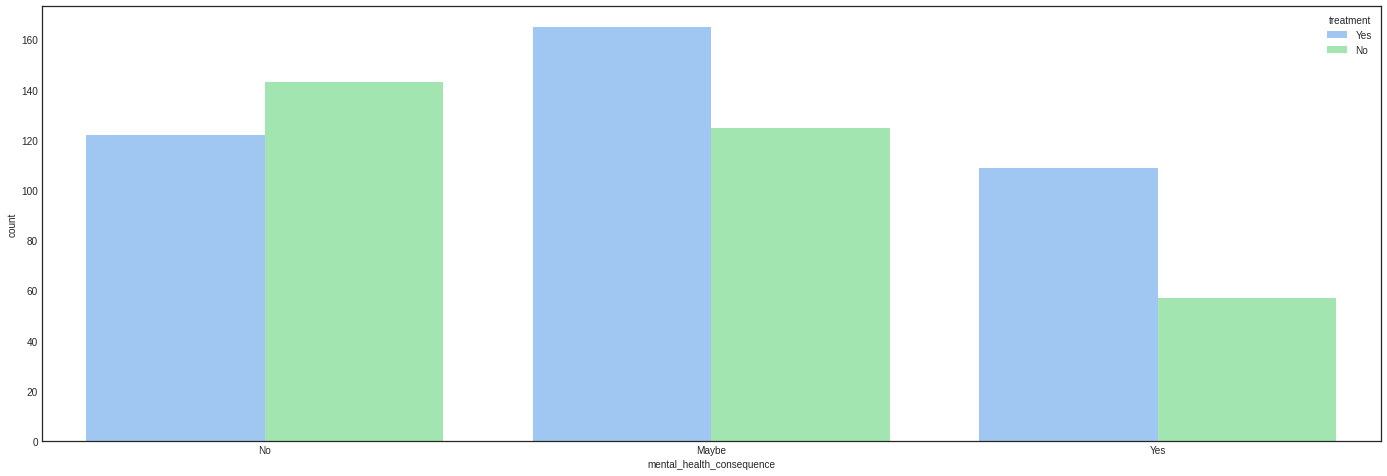

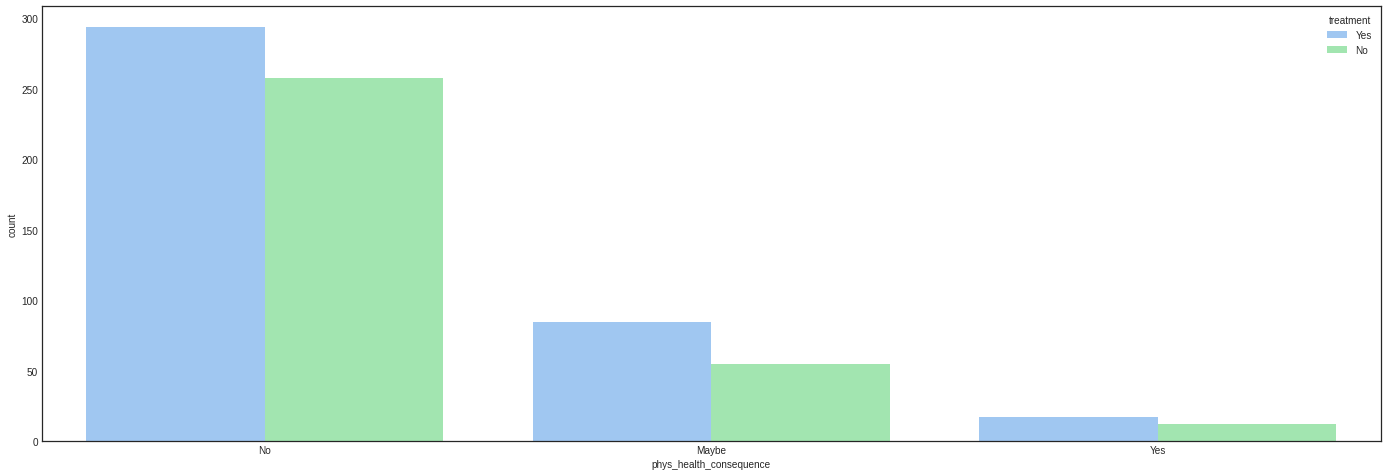

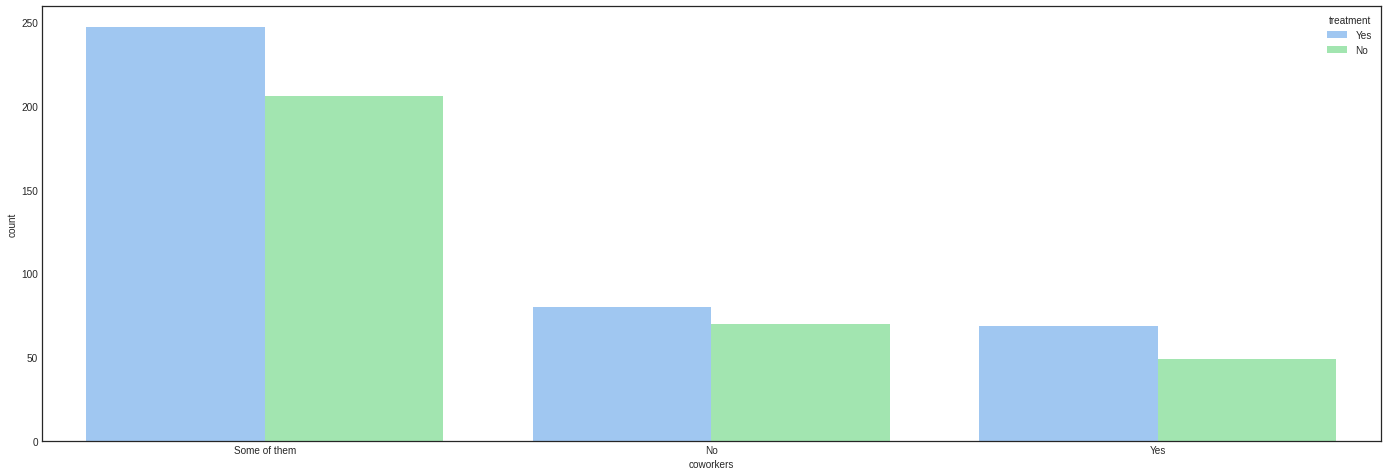

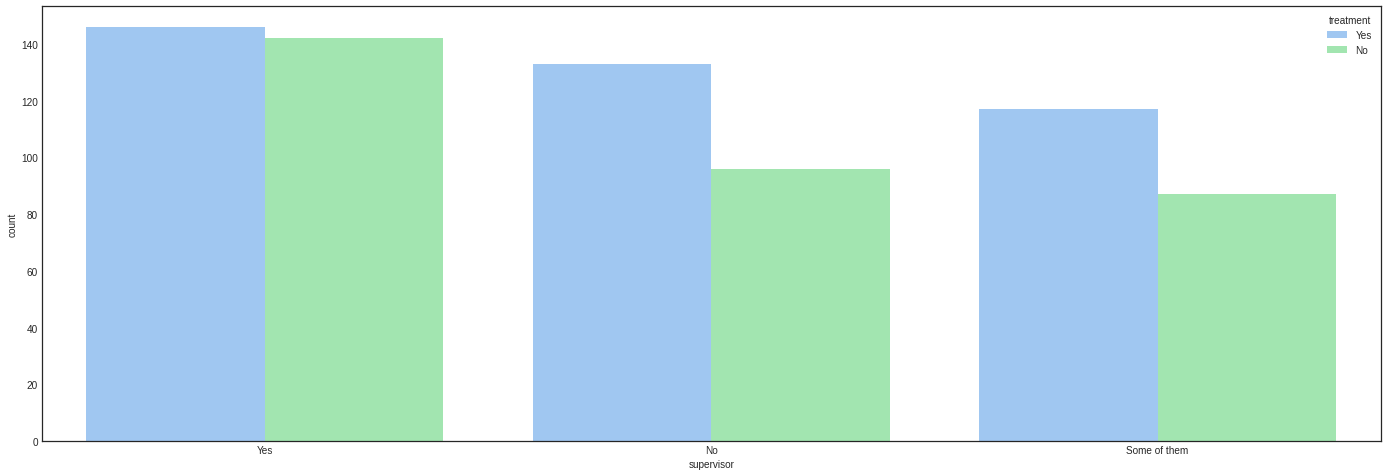

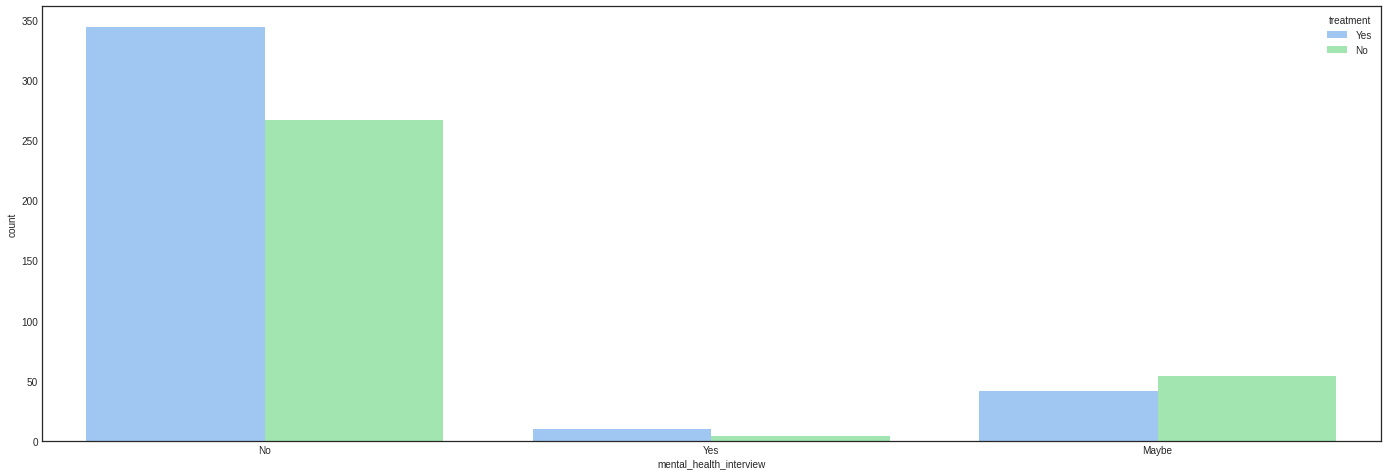

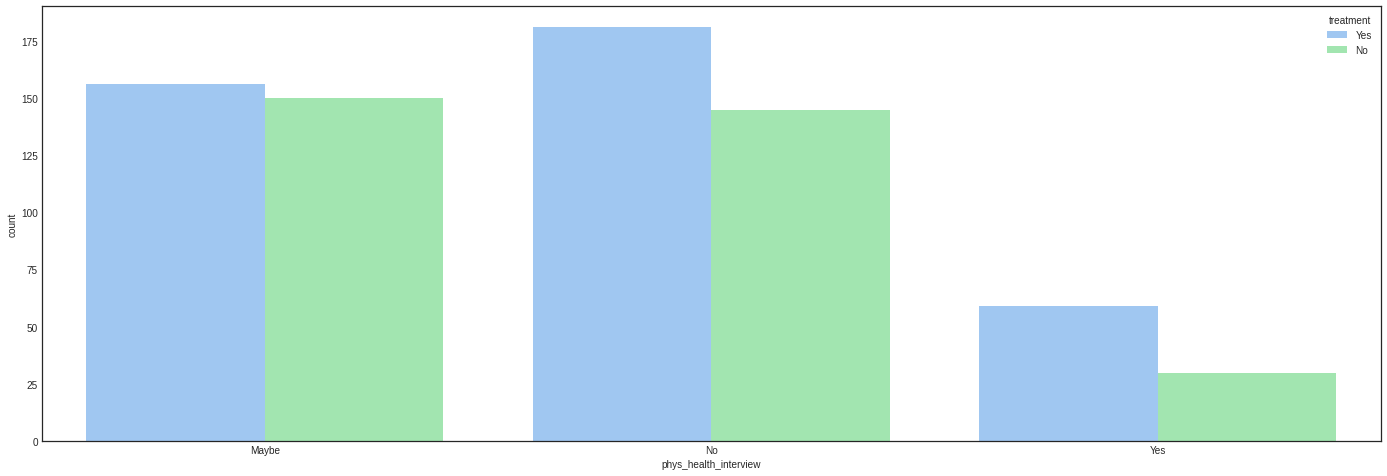

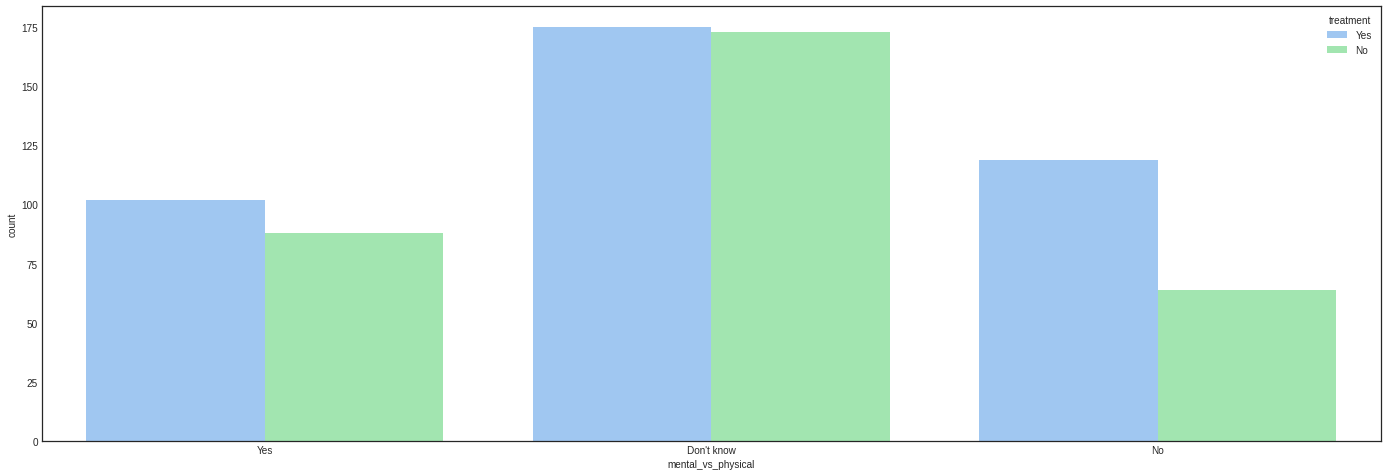

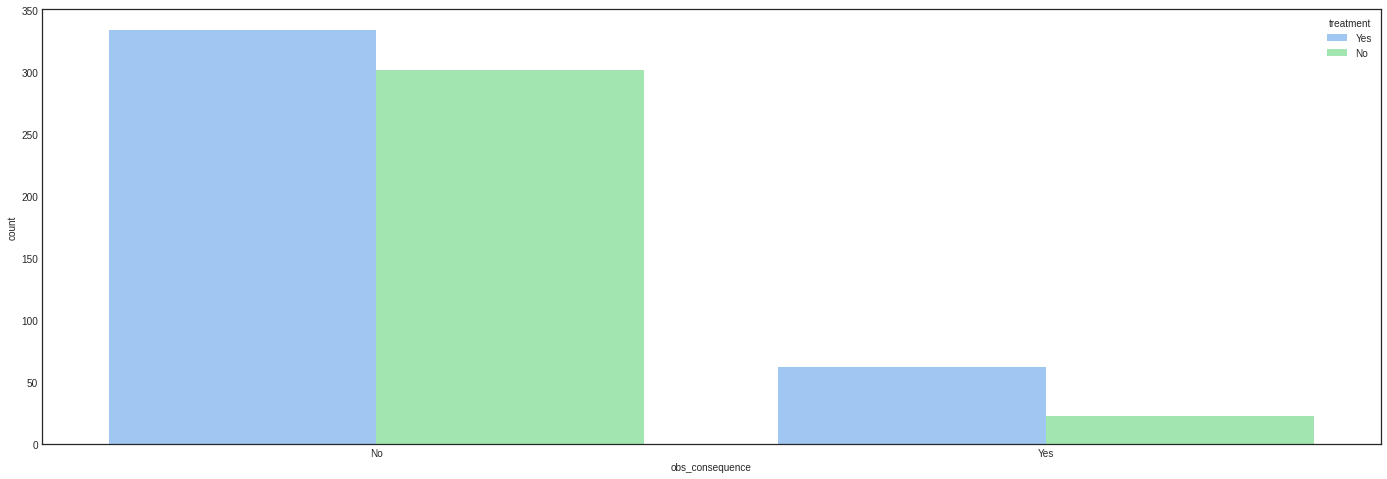

In [387]:
for i in df_USA.columns:
    plt.figure()
    sns.countplot(data = df_USA, x = i, hue = "treatment")

In [388]:
for i in df_USA.columns:
    generate_perc_table(i, "treatment")

               treatment
Age treatment           
18  No             33.33
    Yes            66.67
19  No             50.00
    Yes            50.00
20  No             50.00
...                  ...
47  Yes            50.00
48  No             75.00
    Yes            25.00
49  No             33.33
    Yes            66.67

[64 rows x 1 columns]
                  treatment
Gender treatment           
female No             28.65
       Yes            71.35
male   No             50.84
       Yes            49.16
others No             25.00
       Yes            75.00
                         treatment
Country       treatment           
United States No             45.08
              Yes            54.92
                 treatment
state treatment           
AL    No             14.29
      Yes            85.71
AZ    No             14.29
      Yes            85.71
CA    No             37.98
...                    ...
WA    Yes            58.57
WI    No             25.00
      Yes         

**Summary**    
   
According to above picture and percentage table, we found that:
-  Gender 
 - 71.35% of female have been sought for mental treatment (n = 178). 
 - 49.16% of male have been sought for mental treatment (n = 535).
 - 75% of other gender have been sought for mental treatment (n = 8). 
 - Regardless the gender size, other gender and female have higher percentage sought for mental health.

- Family history
 - People who has family history of mental illness has higher percentage (75.47%) to seek for mental treatment than those who doesn't have family history (38.35%)

- Other factors might be less useful to discuss since we do not know people seek for treatment before or after they joining their companies.


# Inferential Analysis

## 1. Whether the types of health issues (mental or physical) related to people's willingness to discuss with their employer?

- phys_health_consequence: Do you think discussing physical health issue with employer would have negative effect?
- mental_health_consequence: Do you think discussing mental health issue with employer would have negative effect?

In [389]:
phy_cons = df_USA["phys_health_consequence"].value_counts()
phy_cons

No       552
Maybe    140
Yes       29
Name: phys_health_consequence, dtype: int64

In [390]:
mental_cons = df_USA["mental_health_consequence"].value_counts()
mental_cons

Maybe    290
No       265
Yes      166
Name: mental_health_consequence, dtype: int64

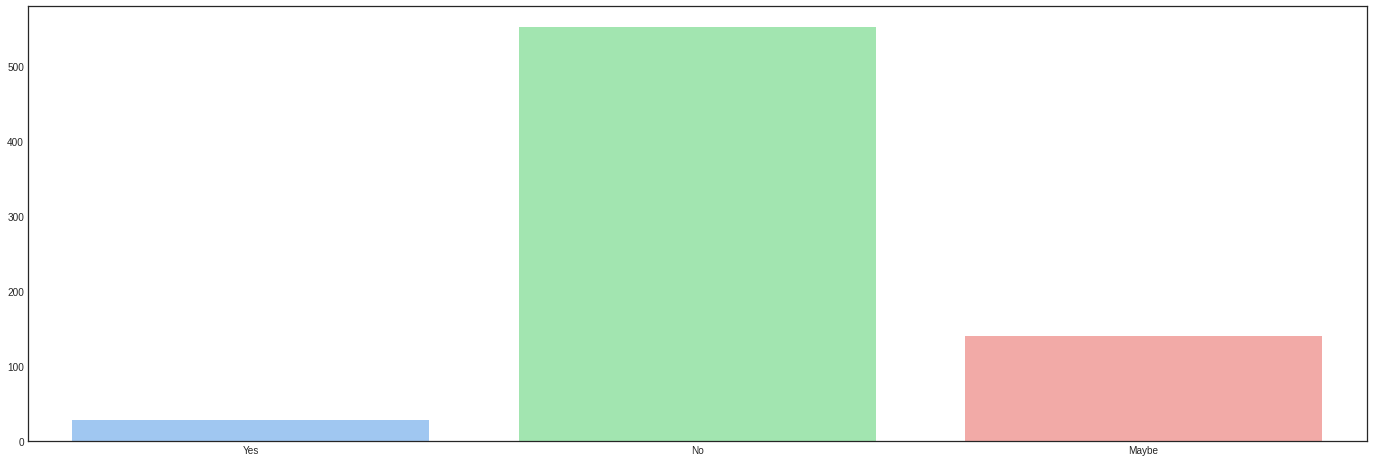

In [391]:
sns.barplot(x = phy_cons.index, y = phy_cons.values, order=["Yes","No","Maybe"])

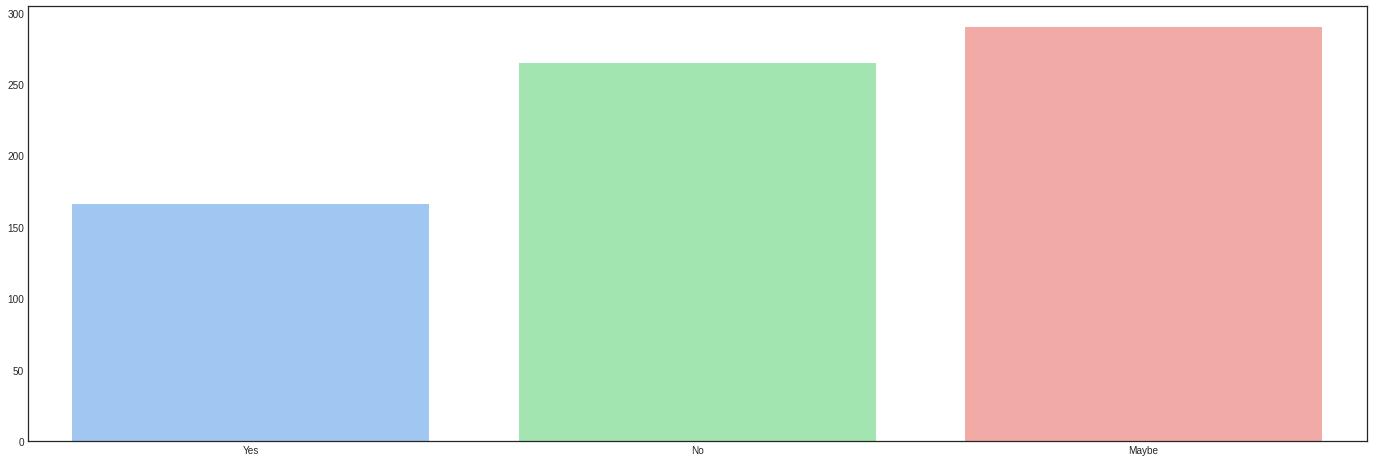

In [392]:
sns.barplot(x = mental_cons.index, y = mental_cons.values, order=["Yes","No","Maybe"])

In [393]:
# Test for independent using Pearsons's Chi-squared Test
# H0: two variables are independent; H1: two variables are dependent
test_data = [[166, 265, 290],
             [29, 552, 140]]
alpha = 0.05
stat, p, dof, expected = chi2_contingency(test_data)

if p <= alpha:
    print("Reject H0. Types of health issues is dependent with people's willingness to discuss with their employer. (alpha = 0.05)")
else:
    print("Fail to reject H0. Types of health issues is independent with people's willingness to discuss with their employer. (alpha = 0.05)") 

Reject H0. Types of health issues is dependent with people's willingness to discuss with their employer. (alpha = 0.05)


- According to our data, people think that discussing mental health issues with their employer more likely to have negative effect than discussing physical health issues.

## 2. Whether colleague's job level related to people's willingness to discussing about mental issue?

- coworkers: Would you be willling to discuss mental issues with your coworkers?
- supervisor: Would you be willling to discuss mental issues with your supervisor?

In [394]:
coworkers = df_USA["coworkers"].value_counts()
coworkers

Some of them    453
No              150
Yes             118
Name: coworkers, dtype: int64

In [395]:
supervisor = df_USA["supervisor"].value_counts()
supervisor

Yes             288
No              229
Some of them    204
Name: supervisor, dtype: int64

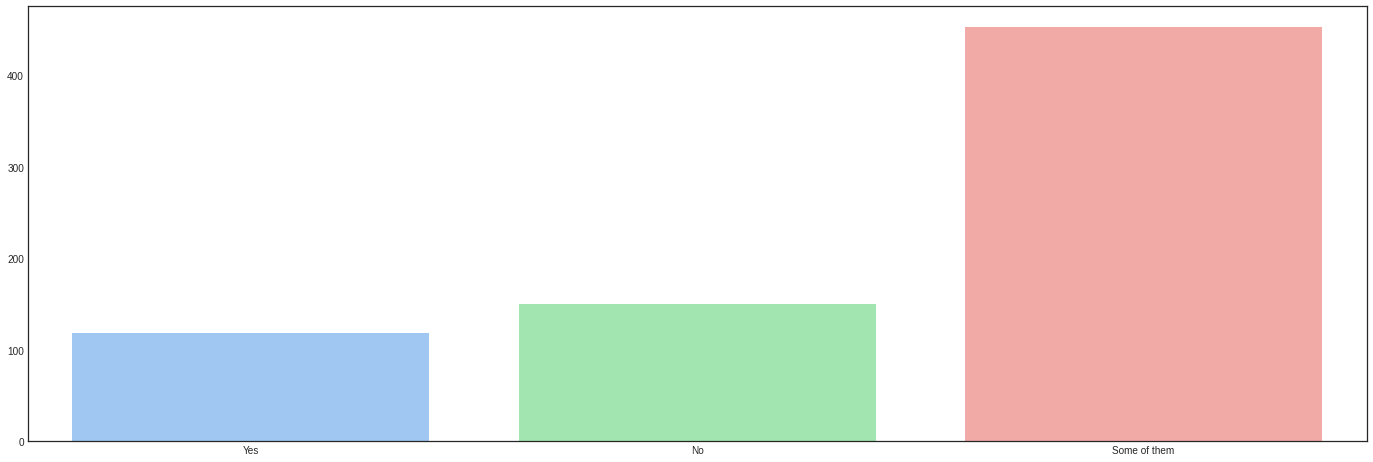

In [396]:
sns.barplot(x = coworkers.index, y = coworkers.values, order=["Yes","No","Some of them"])

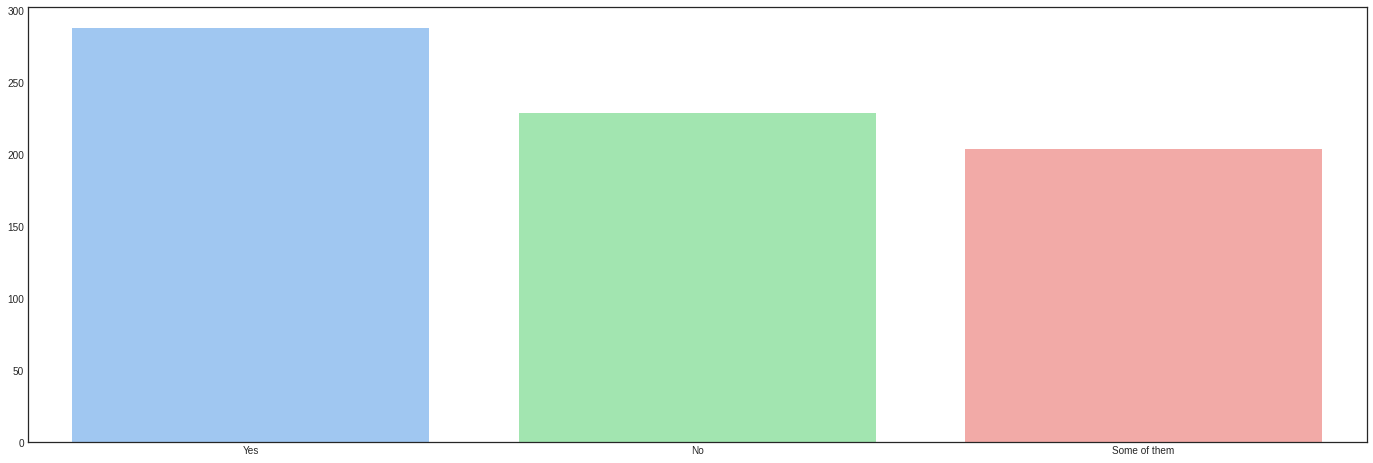

In [397]:
sns.barplot(x = supervisor.index, y = supervisor.values, order=["Yes","No","Some of them"])

In [398]:
# Test for independent using Pearsons's Chi-squared Test
# H0: two variables are independent; H1: two variables are dependent
test_data_2 = [[118, 150, 453],
               [288, 229, 204]]
alpha = 0.05
stat_2, p_2, dof_2, expected_2 = chi2_contingency(test_data_2)

if p_2 <= alpha:
    print("Reject H0. Colleague's job level is dependent with people's willingness to discuss their mental health issue. (alpha = 0.05)")
else:
    print("Fail to reject H0. Colleague's job level is independent with people's willingness to discuss their mental health issue. (alpha = 0.05)") 

Reject H0. Colleague's job level is dependent with people's willingness to discuss their mental health issue. (alpha = 0.05)


- According to our data, colleague's job level is related to people's willingness to discuss their mental health issue. 

## 3. Wether gender related to the willingness to discuss the mental health problem with employer?

- Gender: Male, Female, Other
- mental_health_consequence: Do you think discussing mental health issue with employer would have negative effect?

In [399]:
df_USA.groupby("Gender")["mental_health_consequence"].value_counts()

Gender  mental_health_consequence
female  Maybe                         78
        No                            51
        Yes                           49
male    No                           214
        Maybe                        208
        Yes                          113
others  Maybe                          4
        Yes                            4
Name: mental_health_consequence, dtype: int64

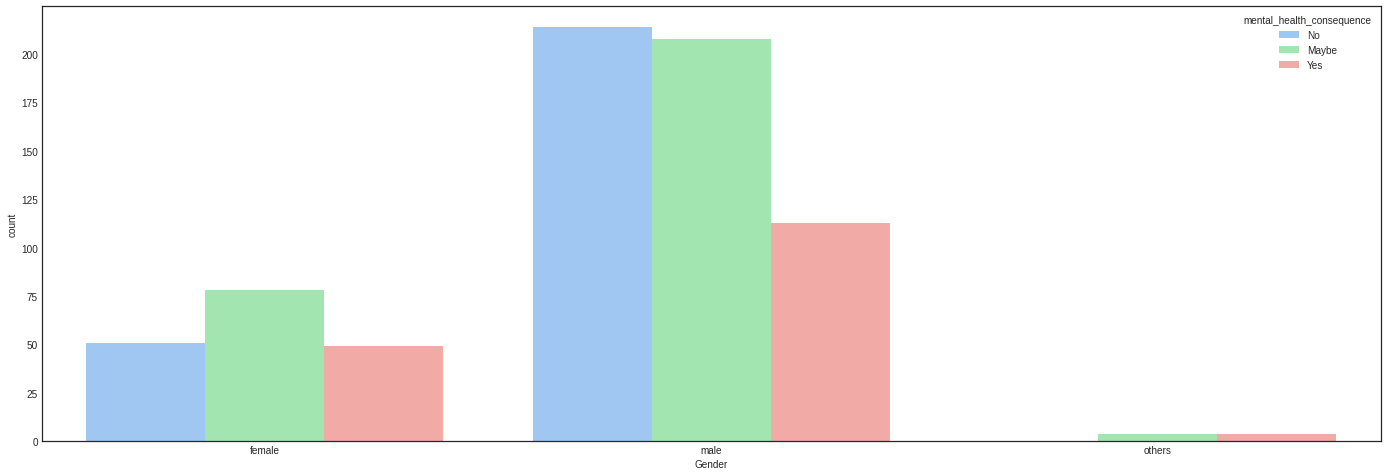

In [400]:
sns.countplot(data = df_USA, x = "Gender", hue = "mental_health_consequence")

**Notes**    
Since "Others gender" category is too small, we have expected value less than 5, which does not meet the assumption while using the chi-squared test. As a result, we only conduct chi-squared test for male and female.

In [401]:
# Test for independent using Pearsons's Chi-squared Test
# H0: two variables are independent; H1: two variables are dependent
test_data_3 = [[49, 51, 78],
               [113, 214, 208]]
alpha = 0.05
stat_3, p_3, dof_3, expected_3 = chi2_contingency(test_data_3)

if p_3 <= alpha:
    print("Reject H0. Gender is dependent with people's willingness to discuss their mental health issue with employer. (alpha = 0.05)")
else:
    print("Fail to reject H0. Types of health issues is independent with people's willingness to discuss their mental health issue employer. (alpha = 0.05)") 

Reject H0. Gender is dependent with people's willingness to discuss their mental health issue with employer. (alpha = 0.05)


- According to our data, gender is a factor that related to how people think wehter discussing their mental health with employer will have negative effect. Female might be more concern about the negative effect.

## 4. Whether company size related to mental health benefits?

- no_employees: How many employees in the company?
- benefits: Does your employer provide mental health benefits?

In [402]:
df_USA["no_employees"].value_counts()

More than 1000    204
26-100            168
6-25              130
100-500           109
1-5                69
500-1000           41
Name: no_employees, dtype: int64

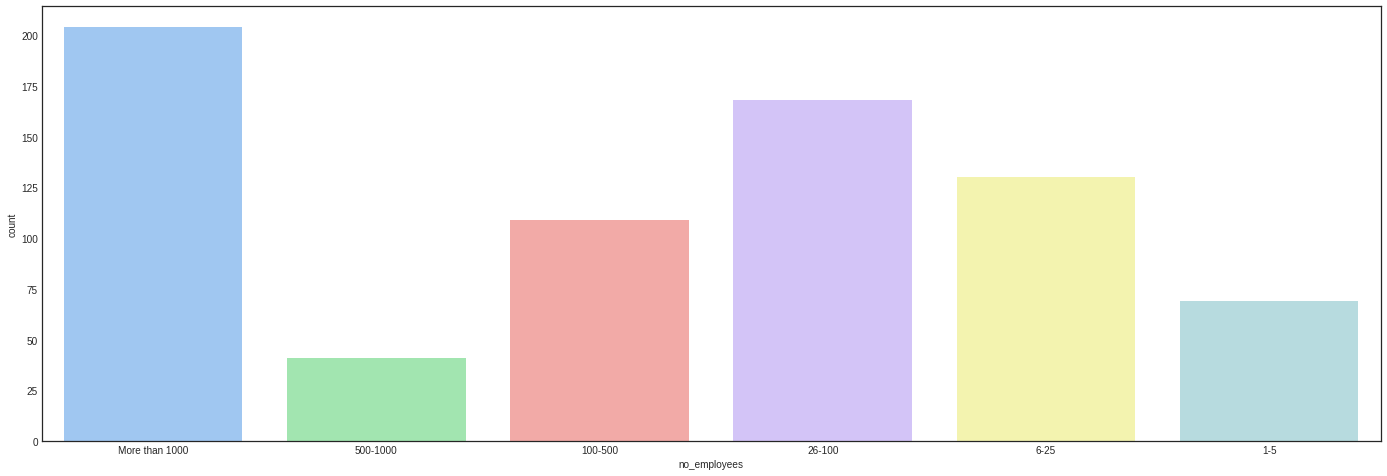

In [403]:
sns.countplot(data = df_USA, x = "no_employees",
              order=["More than 1000","500-1000","100-500", "26-100", "6-25", "1-5"])

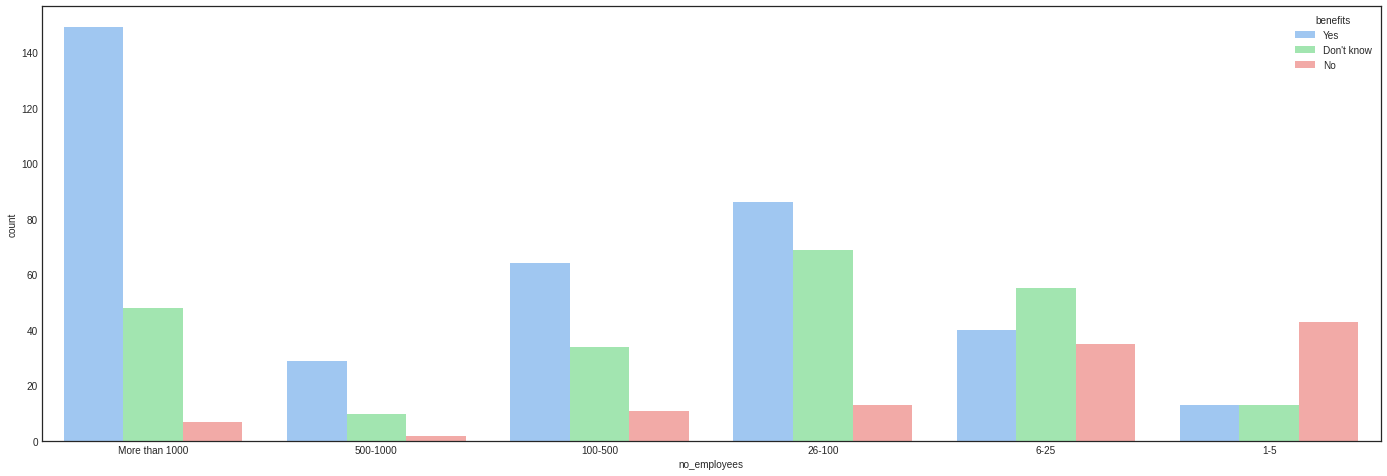

In [404]:
sns.countplot(data = df_USA, x = "no_employees", hue = "benefits",
              order=["More than 1000","500-1000","100-500", "26-100", "6-25", "1-5"])

In [405]:
# Test for independent using Pearsons's Chi-squared Test
# H0: two variables are independent; H1: two variables are dependent
test_data_4 = [[13, 43, 13],
               [64, 11, 34],
               [86, 13, 69],
               [29, 2, 10],
               [40, 35, 55],
               [149, 7, 48]]
alpha = 0.05
stat_4, p_4, dof_4, expected_4 = chi2_contingency(test_data_4)

if p_4 <= alpha:
    print("Reject H0. Company size is dependent with mental health benefits. (alpha = 0.05)")
else:
    print("Fail to reject H0. Company size is independent with mental health benefits. (alpha = 0.05)")


Reject H0. Company size is dependent with mental health benefits. (alpha = 0.05)


- According to our data, company size is related to mental health benefits. In other words, big company might provide more mental benefits for their employees.

# Summary (Part I : Exploratory Data Analysis & Inferential Statistic)

1. **Project Scope**: In this project, we focus on the U.S. mental survey sub-dataset, which includes 721 records. 

2. **Descriptive statistics of dataset**   
(1) Some of the attributes in this survey dataset is inbalance.     
(2) We have major response from California (>17.5%), followed by Washington (\~10%), New York (\~7.5%).    
(3) We have survey response mainly from male (74.2%). Female response accounted for 24.7% and other gender accounted for 1.1%.    
(4) Discuss: 
    - Inbalance of survey records might indicates most of the tech company are in CA; and the majority of the employees in tech company is male.
    - Inbalance of survey records might happen because of the limitation of this survey, or inappropriate survey design.

3. **Inference from dataset**    
(1) Female and other gender group have higher percentage to seek for mental health treatment than male.    
(2) People who have family history of mental illness have higher percentage to seek for mental health treatment.   
(3) Type of health issues (mental or physical) is related to people's willingness to discuss with their employer. In other words, people think that discussing mental health issues with their employer might have more negative effect than discussing physical health issues.    
(4) Colleagues's job level (coworkers or supervisor) is related to people's willingness to discuss with their mental issues.   
(5) Gender is related to people's willingness to discuss their mental health issues with employer. In other words, female are more concern about the negative effect than male.    
(6) Company size is related to their mental health benefits. Big company provides more mental health benefits for their employees.   

# Part II : Prediction Model

Some people might not feel comfortable talking about their mental treatment history. However, if a employee-friendly company would like to pay more attention to their employee's mental health, they could use this prediction model to better understand their employee's condition.

As a result, we would like to predict "Whether people have sought for mental treatment before? (Yes or No)" based on the other survey answers. I'll first use **logistic regression model** with three different training attributes as input to predict the result. Then I'll use **random forest model** as our prediction model. Finally, I'll compare the results from above two models. 

- Treatment column: Have you sought treatment for a mental health condition? (Yes or No)

In [406]:
# Define function which used for transforming data, fiting model, and evaluating result
# Reference to the code structure from: https://machinelearningmastery.com/feature-selection-with-categorical-data/

def transform_training_data(X_train, X_test):
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(X_train)
    X_train_ohe = ohe.transform(X_train)
    X_test_ohe = ohe.transform(X_test)
    return X_train_ohe, X_test_ohe

def transform_target_data(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_ohe = le.transform(y_train)
    y_test_ohe = le.transform(y_test)
    return y_train_ohe, y_test_ohe

def fit_model_get_predict(X_train, y_train, X_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return y_predict

def evaluate_model(y_test, y_predict):
    result = classification_report(y_test, y_predict)
    print(result)

In [407]:
df_USA.head(3)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,IL,Unknown,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,IN,Unknown,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
4,31,male,United States,TX,Unknown,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


## Logistic Regression Model

## Training Attributes 1 (excludes age, country, state)

In [408]:
# y: treatment
# X: all the other attributes (excludes Age, Country, state)
y_1 = df_USA.iloc[:,[6]]
X_1 = df_USA.iloc[:,np.r_[1, 4:6, 7:len(df_USA.columns)]]
X_1 = X_1.astype(str)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.25, random_state = 12)

In [409]:
X_train_ohe_1, X_test_ohe_1 = transform_training_data(X_train_1, X_test_1)
y_train_ohe_1, y_test_ohe_1 = transform_target_data(y_train_1, y_test_1)
y_predict_1 = fit_model_get_predict(X_train_ohe_1, y_train_ohe_1, X_test_ohe_1)
evaluate_model(y_test_ohe_1, y_predict_1)



              precision    recall  f1-score   support

           0       0.88      0.78      0.83        73
           1       0.86      0.93      0.89       108

    accuracy                           0.87       181
   macro avg       0.87      0.85      0.86       181
weighted avg       0.87      0.87      0.87       181



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Training Attributes 2 (excludes country, state)

In [410]:
# y: treatment
# X: all the other attributes (excludes Country, state)
y_2 = df_USA.iloc[:,[6]]
X_2 = df_USA.iloc[:,np.r_[0:2,4:6, 7:len(df_USA.columns)]]
X_2 = X_2.astype(str)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.25, random_state = 12)

In [411]:
X_train_ohe_2, X_test_ohe_2 = transform_training_data(X_train_2, X_test_2)
y_train_ohe_2, y_test_ohe_2 = transform_target_data(y_train_2, y_test_2)
y_predict_2 = fit_model_get_predict(X_train_ohe_2, y_train_ohe_2, X_test_ohe_2)
evaluate_model(y_test_ohe_2, y_predict_2)

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        73
           1       0.86      0.93      0.89       108

    accuracy                           0.87       181
   macro avg       0.87      0.85      0.86       181
weighted avg       0.87      0.87      0.87       181



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Training Attribute 3 (includes all the attributes)

In [412]:
# y: treatment
# X: all the other attributes (excludes Country, state)
y_3 = df_USA.iloc[:,[6]]
X_3 = df_USA.iloc[:,np.r_[0:6, 7:len(df_USA.columns)]]
X_3 = X_3.astype(str)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size = 0.25, random_state = 12)

In [413]:
X_train_ohe_3, X_test_ohe_3 = transform_training_data(X_train_3, X_test_3)
y_train_ohe_3, y_test_ohe_3 = transform_target_data(y_train_3, y_test_3)
y_predict_3 = fit_model_get_predict(X_train_ohe_3, y_train_ohe_3, X_test_ohe_3)
evaluate_model(y_test_ohe_3, y_predict_3)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.84      0.81      0.83        73
           1       0.87      0.90      0.89       108

    accuracy                           0.86       181
   macro avg       0.86      0.85      0.86       181
weighted avg       0.86      0.86      0.86       181



## Random Forest Model

In [414]:
# y: treatment
# X: all the other attributes (excludes Country, state)
y_4 = df_USA.iloc[:,[6]]
X_4 = df_USA.iloc[:,np.r_[0:2,4:6, 7:len(df_USA.columns)]]
X_4= X_4.astype(str)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size = 0.25, random_state = 12)

X_train_ohe_4, X_test_ohe_4 = transform_training_data(X_train_4, X_test_4)
y_train_ohe_4, y_test_ohe_4 = transform_target_data(y_train_4, y_test_4)
rf_model = RandomForestClassifier()
rf_model.fit(X_train_ohe_4, y_train_ohe_4)
y_pred_4 = rf_model.predict(X_test_ohe_4)
rf_result = classification_report(y_test_ohe_4, y_pred_4)
print(rf_result)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.83      0.79      0.81        73
           1       0.86      0.89      0.88       108

    accuracy                           0.85       181
   macro avg       0.85      0.84      0.84       181
weighted avg       0.85      0.85      0.85       181



# Summary (Part II : Prediction Model)

In this part, we used the logistic regression model and random forest model to predict the "treatment" attributes. we have tried three training data for the logistic regression model. But it seems there's not much difference in the performance. 

Also, the performance between logistic regression model and random forest model seems similar. The overall accuracy both higher than 85%, and f1-score all above 80%, which indicates both models are performing well.


# Further Question & Future Steps

1. Which model is suitable for predicting categorical data?    
In this project, I used logistic regression model and random forest model only. However, maybe I need to use different kinds of model, then compare the performance of all the models.     
> Future Steps: Need to know other kinds of models for categorical data prediction.
2. How to choose which attributes should include in the training dataset?   
In this project, I manually and randomly choose the attributes in the training dataset. It is somehow inefficient.
> Future Steps: Knowing the technique to choose the best attributes.
3. Transform categorical data     
In this project, I used one-hot encoder for training set; and used label encoder for target column. Seems like there are many different methods for encoding. 
> Future Steps: Learn more about the encdoing methods, and their pros & cons.




# Technical Reference
- [Mental Health in Tech Survey Dataset - Kaggle](https://www.kaggle.com/osmi/mental-health-in-tech-survey)
- [How to Remove Outliers for Machine Learning](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
- [A Gentle Introduction to the Chi-Squared Test for Machine Learning](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)
- [How to Perform Feature Selection with Categorical Data](https://machinelearningmastery.com/feature-selection-with-categorical-data/)
- [Ordinal and One-Hot Encodings for Categorical Data](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)
- [Metrics To Evaluate Machine Learning Algorithms in Python](https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/)
- [Mental health survey analysis - Kaggle Notebook](https://www.kaggle.com/aishu200023/mental-health-survey-analysis)

# Information Reference
- [Mental Health in the Workplace](https://www.cdc.gov/workplacehealthpromotion/tools-resources/workplace-health/mental-health/index.html)
- [15 Gender Identity Terms You Need to Know to Build an Inclusive Workplace](https://business.linkedin.com/talent-solutions/blog/diversity/2019/15-gender-identity-terms-for-inclusive-workplace)